# HR Analytics Project

In [53]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'imblearn'

Importing all the neccessary libraries here.

In [32]:
dt=pd.read_csv("D:\Internship\Datatraineed\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [33]:
dt

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
dt.columns # check the columns name 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [35]:
dt.dtypes # check the column types

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Ensuring that in future observations we do not have any truncated infomation in our Jupyter notebook

In [36]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
dt.nunique().to_frame("unique_Value") 

,unique_Value
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


#we are checking the total number of unique value present in each column be it categories or numerical data.

In [38]:
dt.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Luckily we do not have any missing value in any of our columns so won't have to worry handing missing data

In [39]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method in transpose format 

In [40]:
dt.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

i am dropping all the unwanted after careful observations done above.

In [41]:
object_datatype=[]
for x in dt.dtypes.index:
    if dt.dtypes[x]=='object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [42]:
interger_datatype=[]
for x in dt.dtypes.index:
    if dt.dtypes[x]=='int64':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we have a list of all the 23 columns that hold integer datatype that will comprise the numerical data part of our ML project.



# Visualizaion

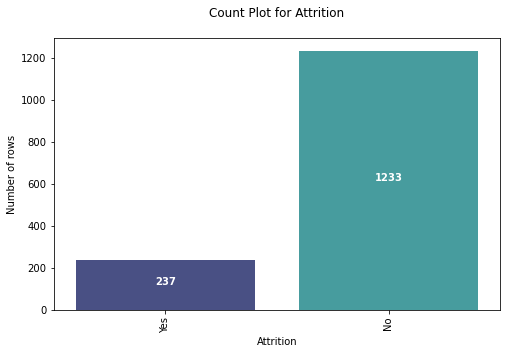

In [43]:
plt.figure(figsize=(8,5))
col_name='Attrition'
values=dt[col_name].value_counts()
index=0
ax=sns.countplot(dt[col_name],palette='mako')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

so looking at the above countplot we can see that our target label is quite imbalanced and will needed to be trated for the same

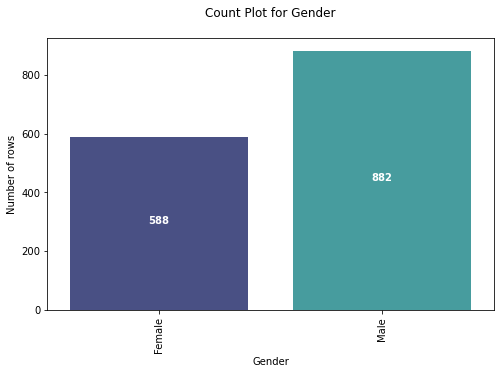

In [44]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index= index+1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In the Gender column we can see that the number of male employees is higher than the female employees. This is one of the situation in mostly all the organizational workforce across India.



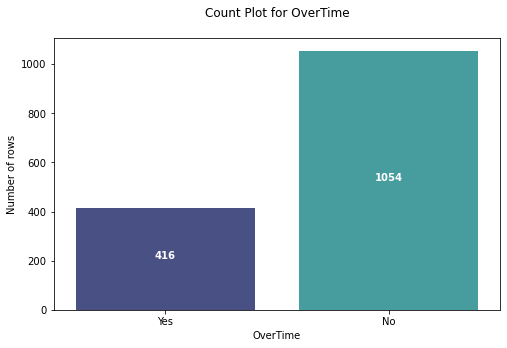

In [45]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

The Overtime column shows our number of employees who do over time and do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

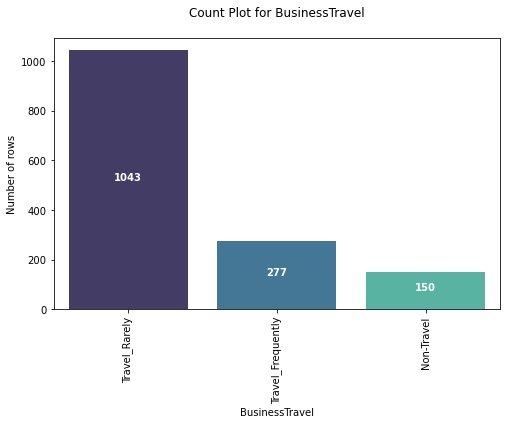

In [46]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.



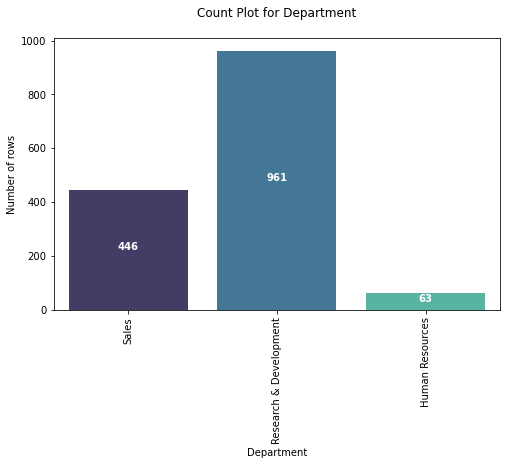

In [47]:
plt.figure(figsize=(8,5))
col_name="Department"
values=dt[col_name].value_counts()
index=0
ax=sns.countplot(dt[col_name],palette='mako')
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
           horizontalalignment='center',fontweight='bold',color='w')
    index=index+1

    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In the Department column we see lots of values for R&D department however the least number of employees are in HR since an organisation would need a limited number of Human Resources team it makes sense for it to have the least value.



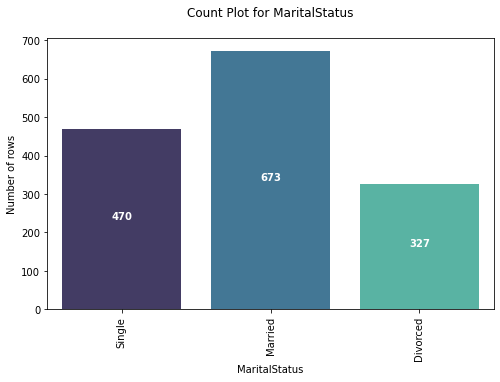

In [48]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()


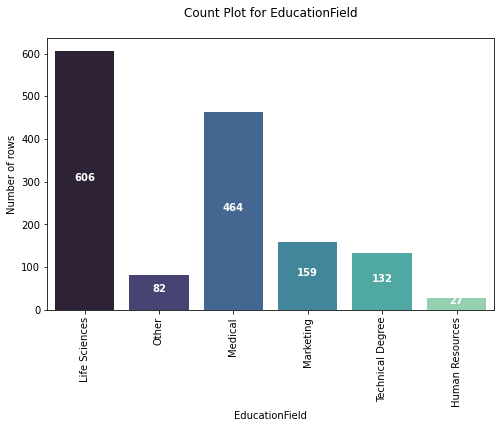

In [49]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

For the EducationField column we have employees majorly from the Life Sciences educational background and the least from HR since that department needs lesser number of employees to contribute in the organization.

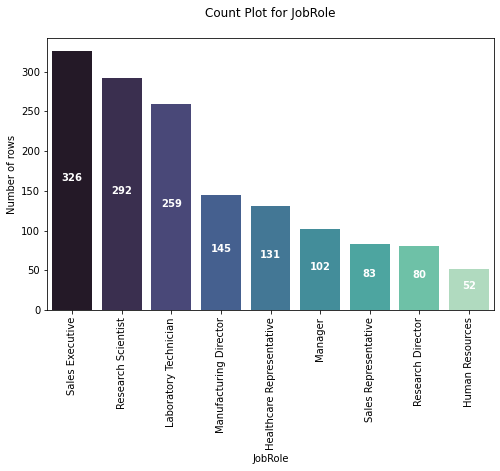

In [50]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = dt[col_name].value_counts()
index = 0
ax = sns.countplot(dt[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

Pertaining to the JobRole column we can see that the highest number is found in sales executive designation since they are the grass root level employees who are the most productive and handle the business value directly. And as notice in other plots we have the lowest number for HR roles as the employees present in that department are the lowest as well.



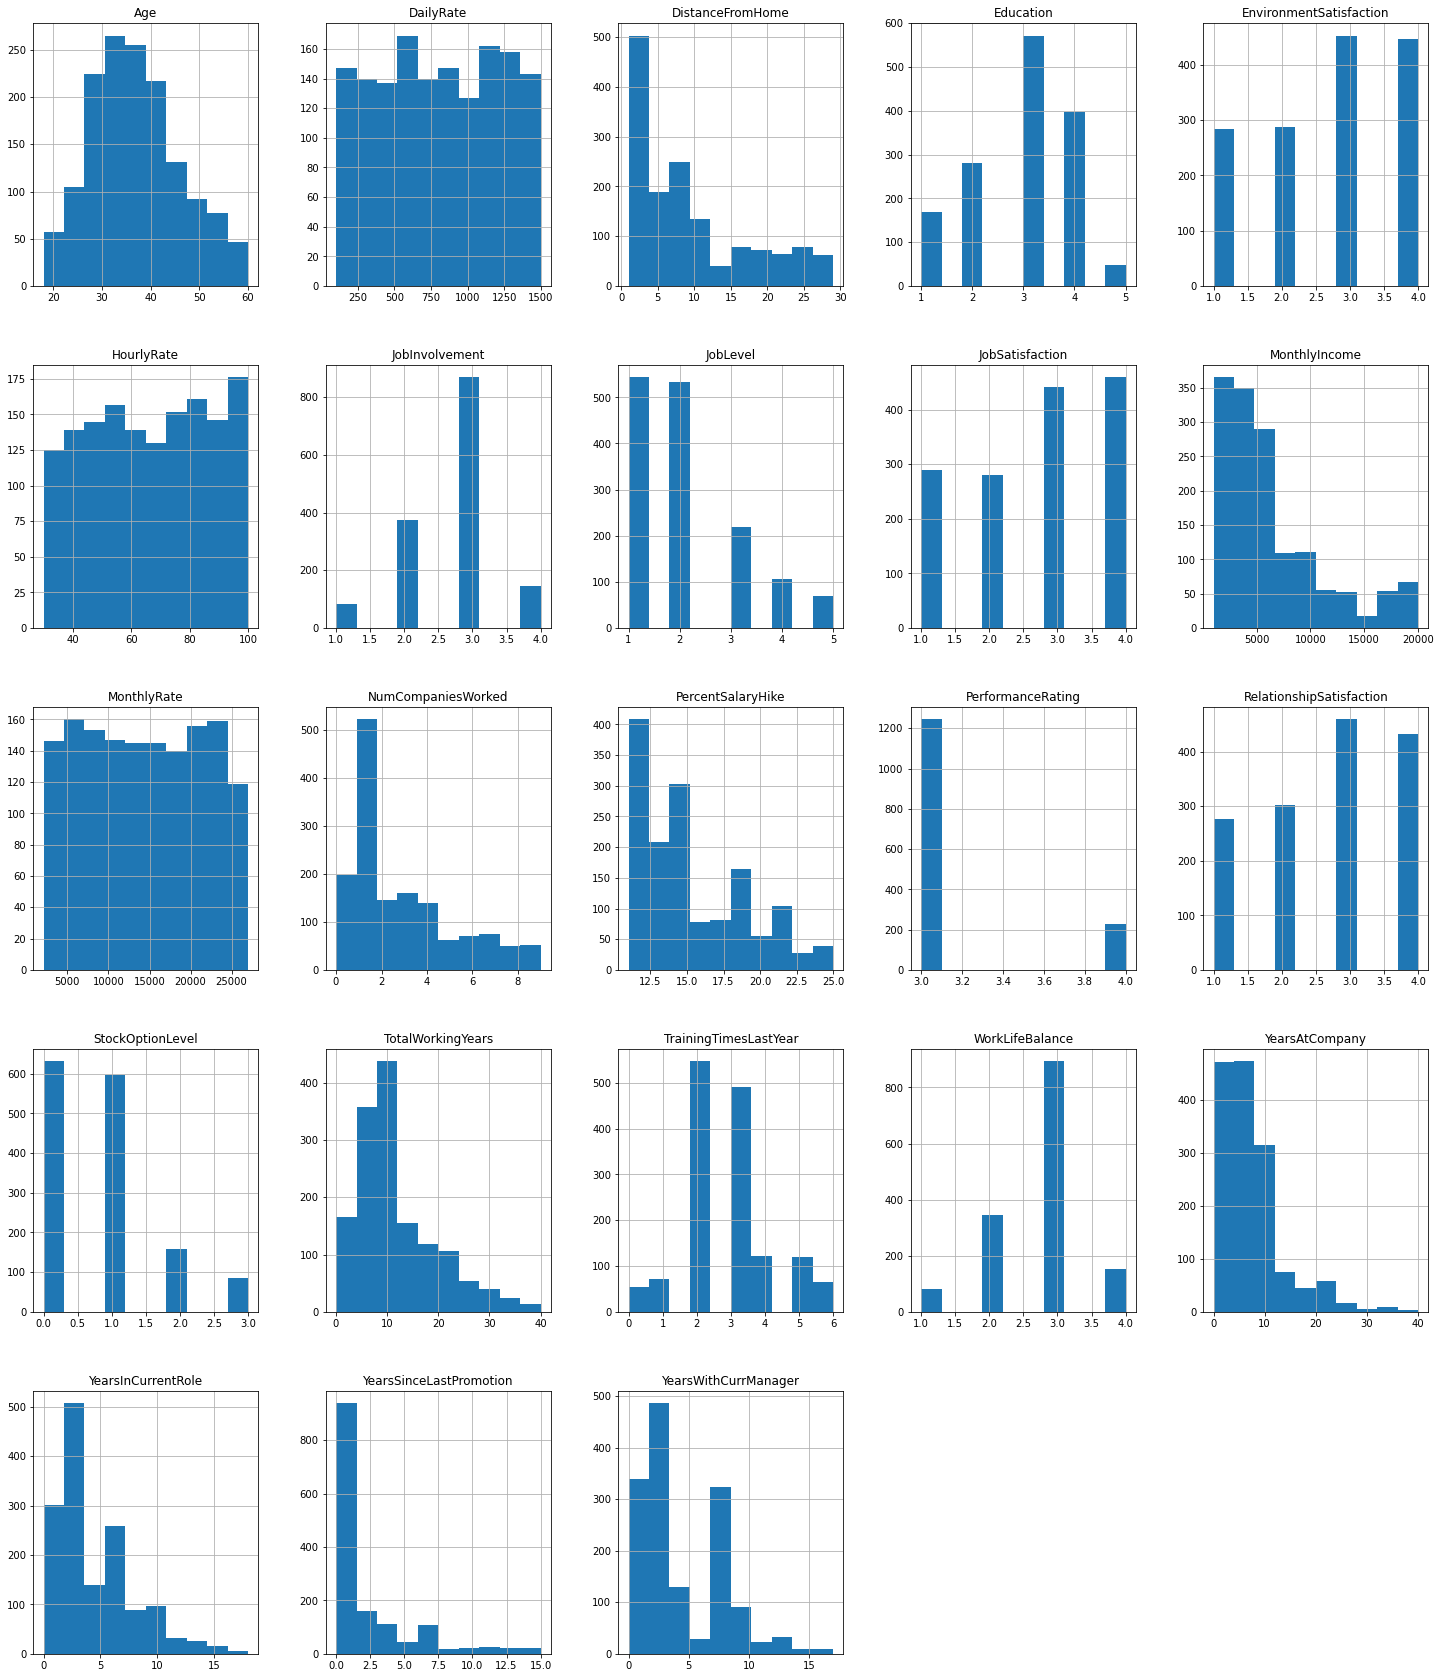

In [55]:
dt.hist(figsize=(25,30))
plt.show()

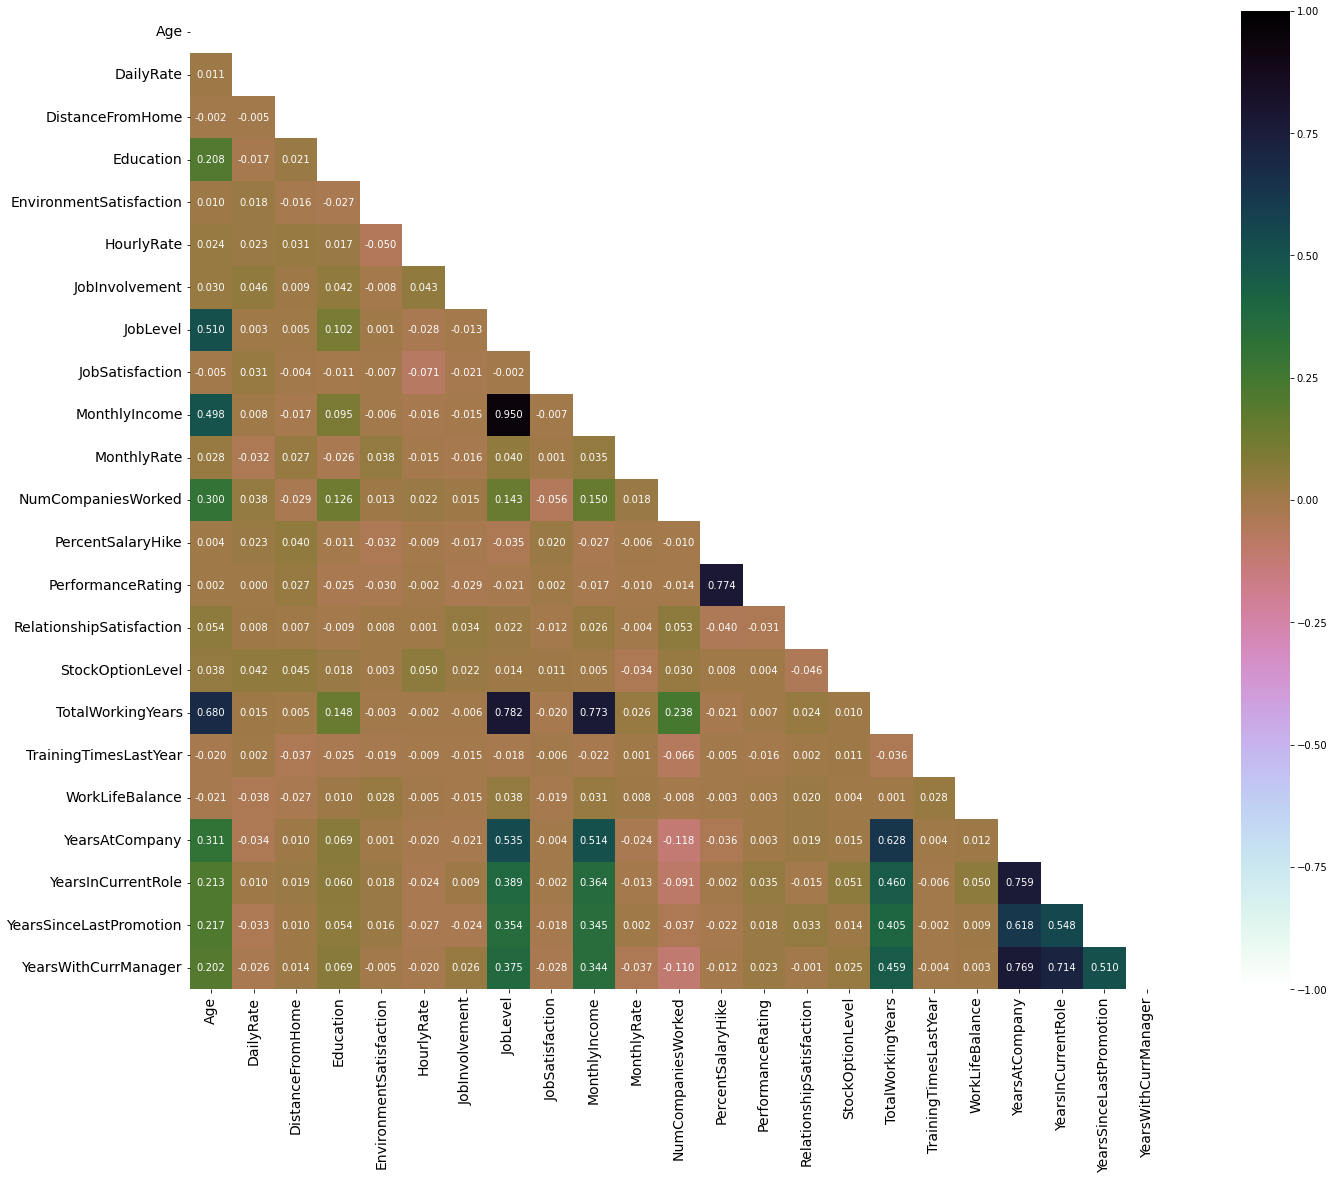

In [57]:
upper_triangle = np.triu(dt.corr())
plt.figure(figsize=(26,18))
sns.heatmap(dt.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Correlation using a Heatmap